# Get historical stock prices from Yahoo! Finance

In [1]:
%autosave 0
%matplotlib inline
import yahoo_stocks as ys

Autosave disabled


In [2]:
# Load and align daily data for several symbols.
# First input must be a list of symbols Yahoo can recognize.
# Returns a dictionary of DataFrames.
Data = ys.load(['SPY','TSLA','^DJR'],start_date='2010-1-1',freq='d')
print( "Loaded these DataFrames:" )
[ print(x) for x in Data.keys() ]
print( )

Loading symbols
SPY
TSLA
^DJR
All symbols loaded.

Loaded these DataFrames:
Open
Close
AdjClose
TotalValue
Volume
Low
Dividend
ShareMultiplier
High



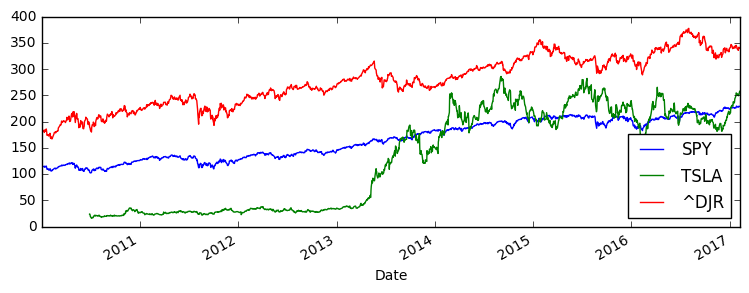

In [3]:
# Show a plot of daily closing prices (*not* adjusted for dividends and splits)
Data['Close'].plot(figsize=(9,3))

In [4]:
# Show recent dividends (if any)
fDiv = (Data['Dividend'] > 0).any(axis=1)
Data['Dividend'].loc[fDiv].tail()

,SPY,TSLA,^DJR
Date,,,
2015-12-18,1.212,0.0,0.0
2016-03-18,1.050,0.0,0.0
2016-06-17,1.078,0.0,0.0
2016-09-16,1.082,0.0,0.0
2016-12-16,1.329,0.0,0.0


In [5]:
# Use get_table() to load all data for one symbol as a single DataFrame
AAPL = ys.get_table('AAPL',start_date='2010-1-1')
AAPL.head()

,Open,High,Low,Close,Volume,AdjClose,Dividend,ShareMultiplier,TotalValue
Date,,,,,,,,,
2010-01-04,213.429998,214.499996,212.380001,214.009998,123432400.0,27.847252,0.0,1.0,214.009998
2010-01-05,214.599998,215.589994,213.249994,214.379993,150476200.0,27.895396,0.0,1.0,214.379993
2010-01-06,214.379993,215.230000,210.750004,210.969995,138040000.0,27.451683,0.0,1.0,210.969995
2010-01-07,211.750000,212.000006,209.050005,210.580000,119282800.0,27.400936,0.0,1.0,210.580000
2010-01-08,210.299994,212.000006,209.060005,211.980005,111902700.0,27.583106,0.0,1.0,211.980005


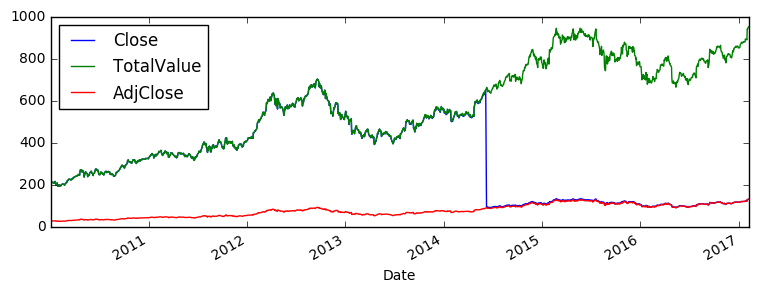

In [6]:
# 'AdjClose' is Yahoo's closing price adjusted for splits and dividends.
# 'TotalValue' is a different method for adjusting prices
AAPL[['Close','TotalValue','AdjClose']].plot(figsize=(9,3))

In [7]:
# Make a Yahoo! API query without actually getting the data
ys.make_url('IWM',start_date='2010-2-1')

'http://real-chart.finance.yahoo.com/x?&a=1&b=1&c=2010&d=1&e=7&f=2017&g=d&s=IWM&y=0&z=30000'

In [8]:
# Use help() for details
help(ys)

Help on module yahoo_stocks:

NAME
    yahoo_stocks - Import historical stock/index/ETF data into pandas from Yahoo! Finance.

DESCRIPTION
    Gets these variables: ['Open','High','Low','Close','Volume','Adj Close'].
    Also calculates ['Dividend','ShareMultiplier','TotalValue'].
    
    'ShareMultiplier' is "How many shares would I have if I bought 1 share on start_date?"
    
    'TotalValue' is "How much cash would I have if I bought 1 share on start_date,
    saved all the cash dividends I received, and sold all my shares today?"

FUNCTIONS
    get_table(*args, **kwargs)
    
    load(symbol_list, start_date='2000-1-1', stop_date=datetime.date(2017, 2, 7), freq='d', verbose=True)
    
    make_url(symbol, start_date='2000-1-1', stop_date=datetime.date(2017, 2, 7), freq='d')

FILE
    /Programs/Python/YahooStocks/yahoo_stocks.py


